In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
import cv2 as cv

In [2]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

9920512it [00:04, 2238699.44it/s]                                                                                      


Extracting drive/My Drive/mnist/MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz


32768it [00:00, 159600.62it/s]                                                                                         


Extracting drive/My Drive/mnist/MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz


1654784it [00:01, 1067775.89it/s]                                                                                      


Extracting drive/My Drive/mnist/MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz


8192it [00:00, 62498.96it/s]                                                                                           


Extracting drive/My Drive/mnist/MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


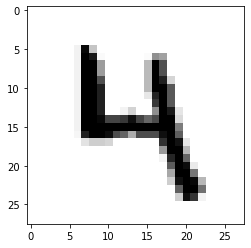

In [4]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

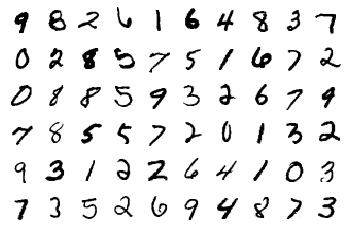

In [5]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [6]:
from torch import nn

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [8]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

# logps = model(images)
logps = model(images.cuda())
# loss = criterion(logps, labels)
loss = criterion(logps, labels.cuda())

In [9]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [ 0.0049,  0.0049,  0.0049,  ...,  0.0049,  0.0049,  0.0049],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0026,  0.0026,  0.0026,  ...,  0.0026,  0.0026,  0.0026]],
       device='cuda:0')


In [10]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [11]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

optimizer.zero_grad()

# output = model(images)
output = model(images.cuda())
# loss = criterion(output, labels)
loss = criterion(output, labels.cuda())
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0313, -0.0117,  0.0206,  ..., -0.0313,  0.0110, -0.0153],
        [ 0.0082,  0.0127, -0.0242,  ...,  0.0026,  0.0248, -0.0029],
        [-0.0102,  0.0222,  0.0135,  ..., -0.0328, -0.0073, -0.0274],
        ...,
        [-0.0128, -0.0281,  0.0214,  ..., -0.0195,  0.0350, -0.0197],
        [ 0.0178,  0.0118, -0.0245,  ..., -0.0125, -0.0008,  0.0111],
        [-0.0190,  0.0131, -0.0046,  ..., -0.0051,  0.0199,  0.0086]],
       device='cuda:0', requires_grad=True)
Gradient - tensor([[-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0023, -0.0023, -0.0023,  ..., -0.0023, -0.0023, -0.0023],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007]],
       device='cuda:0')


In [12]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0314, -0.0117,  0.0206,  ..., -0.0313,  0.0110, -0.0153],
        [ 0.0082,  0.0127, -0.0242,  ...,  0.0026,  0.0248, -0.0029],
        [-0.0102,  0.0222,  0.0135,  ..., -0.0328, -0.0073, -0.0274],
        ...,
        [-0.0128, -0.0281,  0.0214,  ..., -0.0195,  0.0350, -0.0197],
        [ 0.0179,  0.0118, -0.0244,  ..., -0.0125, -0.0008,  0.0112],
        [-0.0190,  0.0131, -0.0046,  ..., -0.0051,  0.0199,  0.0086]],
       device='cuda:0', requires_grad=True)


In [13]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        
#         output = model(images)
#         loss = criterion(output, labels)
        output = model(images.cuda())
        loss = criterion(output, labels.cuda())
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6386806435628868
Epoch 1 - Training loss: 0.2815835520005557
Epoch 2 - Training loss: 0.21933059444400801
Epoch 3 - Training loss: 0.17636025009919076
Epoch 4 - Training loss: 0.14692876446666495
Epoch 5 - Training loss: 0.12616913178280345
Epoch 6 - Training loss: 0.11090759667696984
Epoch 7 - Training loss: 0.098899948317359
Epoch 8 - Training loss: 0.08976479576054666
Epoch 9 - Training loss: 0.08033388832024038

Training Time (in minutes) = 2.4244545340538024


In [14]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
#         logps = model(img)
        logps = model(img.cuda())

    ps = torch.exp(logps)
#     probab = list(ps.numpy()[0])
    probab = list(ps.cpu().numpy()[0])

    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9681
